## Generated figures:
* 4C (mouse-average lick ratio over days)
* 4D (individual-mouse lick ratio over days)

We also run the statistical tests needed for these figures.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import sem, ranksums

from os import sys
sys.path.append('..')
import data_util
import plotting_util
import style

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = "none"

FIG_DIR = "../figures/"

In [2]:
lick_rate = data_util.load_all_binned_behavior_data("lick_rate")

1
2
3
4
5


In [5]:
lick_ratio_mice_days = data_util.compute_licking_ratio(lick_rate)

lick_ratio_avg_mice_days = np.nanmean(lick_ratio_mice_days, axis=-1)
lick_ratio_std_errs_mice_days = data_util.nansem(lick_ratio_mice_days, axis=-1)

lick_ratio_days = np.swapaxes(lick_ratio_mice_days, 0, 1).reshape((8, -1))
lick_ratio_avg_days = np.nanmean(lick_ratio_days, axis=-1)
lick_ratio_std_errs_days = data_util.nansem(lick_ratio_days, axis=-1)

In [6]:
"""
Run statistical tests
"""

indiv_mouse_p_vals = np.zeros((5, 8, 8))
for mouse_num in range(1, 6):
    for i in range(8):
        for j in range(i):
            p = data_util.ranksums_nan(lick_ratio_mice_days[mouse_num-1, i],
                                       lick_ratio_mice_days[mouse_num-1, j])[1]
            indiv_mouse_p_vals[mouse_num-1, i,j] = p
indiv_mouse_p_vals = indiv_mouse_p_vals + np.swapaxes(indiv_mouse_p_vals, 1, 2)
indiv_mouse_p_vals[:, np.arange(8), np.arange(8)] = 1.

mouse_pooled_p_vals = np.zeros((8, 8))
for i in range(8):
        for j in range(i):
            p = data_util.ranksums_nan(lick_ratio_days[i], lick_ratio_days[j])[1]
            mouse_pooled_p_vals[i,j] = p
mouse_pooled_p_vals = mouse_pooled_p_vals + mouse_pooled_p_vals.T
np.fill_diagonal(mouse_pooled_p_vals, 1.)

print("Test for adj-day changes in mouse-pooled lick ratio")
adj_p_vals = np.array([mouse_pooled_p_vals[i, i+1] for i in range(7)])
print(adj_p_vals)
print("BON CORRECTION:", adj_p_vals*7)

print("\nTest for day 0--4 change in individual-mouse lick ratio")
days_0_4_p_vals_indiv_mice = indiv_mouse_p_vals[:, 2, 6]
print(days_0_4_p_vals_indiv_mice)
print("BON CORRECTION:", days_0_4_p_vals_indiv_mice*5)

print("\nTest for day 4--5 change in individual-mouse lick ratio")
days_4_5_p_vals_indiv_mice = indiv_mouse_p_vals[:, 6, 7]
print(days_4_5_p_vals_indiv_mice)
print("BON CORRECTION:", days_4_5_p_vals_indiv_mice*5)


Test for adj-day changes in mouse-pooled lick ratio
[8.27976153e-03 7.78902641e-01 1.05955364e-02 1.95874184e-10
 5.31936641e-11 1.99718905e-03 9.36934582e-12]
BON CORRECTION: [5.79583307e-02 5.45231849e+00 7.41687548e-02 1.37111929e-09
 3.72355649e-10 1.39803234e-02 6.55854207e-11]

Test for day 0--4 change in individual-mouse lick ratio
[4.24647311e-07 5.66369547e-11 1.37964065e-09 3.03775241e-01
 1.05550393e-04]
BON CORRECTION: [2.12323656e-06 2.83184774e-10 6.89820324e-09 1.51887620e+00
 5.27751967e-04]

Test for day 4--5 change in individual-mouse lick ratio
[6.20581530e-03 1.04230700e-09 4.46245767e-03 1.35945680e-03
 8.82671043e-03]
BON CORRECTION: [3.10290765e-02 5.21153499e-09 2.23122884e-02 6.79728400e-03
 4.41335521e-02]


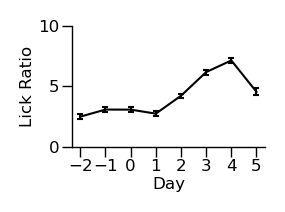

In [9]:
"""
Plot mouse-average lick ratio
"""

fig, ax = plt.subplots(1, 1, figsize=(1.25, .8), dpi=200)

day_nums = np.arange(8) - 2
ax.errorbar(np.arange(8)-2, lick_ratio_avg_days, lick_ratio_std_errs_days, c="black", **style.errorbar_style)
ax.set_xlabel("Day", **style.label_style)
ax.set_ylabel("Lick Ratio", **style.label_style)
ax.set_xticks(day_nums)
ax.set_ylim([0, 10])
plotting_util.prettyify_ax(ax)

plt.savefig(FIG_DIR + "lick_ratio_errorbars.svg", bbox_inches="tight")

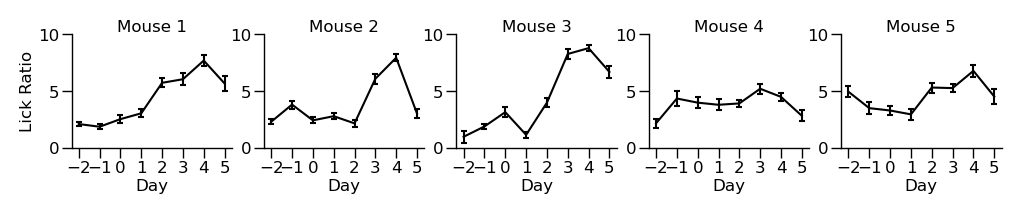

In [12]:
"""
Plot individual-mouse lick ratio
"""

fig, axes = plt.subplots(1, 5, figsize=(6, .75), dpi=200)
fig.subplots_adjust(wspace=.2)
ylim = [0, 10]

for mouse_num in range(1, 6):
    i = mouse_num - 1
    ax = axes[i]
    ax.errorbar(np.arange(8)-2, lick_ratio_avg_mice_days[i],  lick_ratio_std_errs_mice_days[i],
                **style.errorbar_style, c="black")
    ax.set_ylim(ylim)
    ax.set_xticks(np.arange(8)-2)
    ax.set_xlabel("Day", **style.label_style)
    ax.set_title("Mouse " + str(mouse_num), **style.title_style)
    plotting_util.prettyify_ax(ax)
    
axes[0].set_ylabel("Lick Ratio", **style.label_style)

plt.savefig(FIG_DIR + "lick_ratio_indiv_mice.svg", bbox_inches="tight")